# Понижение размерности. Отбор признаков. Извлечение признаков

### Загрузка данных

Классификация

In [82]:
import pandas as pd
from imblearn.over_sampling import SMOTE

cdata = pd.read_csv('D:/PythonWork/Machine learning and big data/data/balanced_diabetes_data.csv', encoding='utf-8', delimiter=',')

X = cdata.drop(columns=['Diabetes_012', 'Unnamed: 0'])
y = cdata['Diabetes_012']

In [83]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,True,True,True,40,True,False,False,False,False,True,...,True,False,5,18,15,True,False,9,4,3
1,False,False,False,25,True,False,False,True,False,False,...,False,True,3,0,0,False,False,7,6,1
2,True,True,True,28,False,False,False,False,True,False,...,True,True,5,30,30,True,False,9,4,8
3,True,False,True,27,False,False,False,True,True,True,...,True,False,2,0,0,False,False,11,3,6
4,True,True,True,24,False,False,False,True,True,True,...,True,False,2,3,0,False,False,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622537,True,True,True,33,False,False,False,True,True,True,...,True,False,3,0,9,False,False,7,6,8
622538,True,False,True,30,False,False,False,True,True,True,...,True,False,3,0,0,False,False,10,4,6
622539,True,True,True,21,False,False,False,True,False,False,...,True,False,2,0,0,False,False,12,6,4
622540,True,True,True,37,False,False,False,True,True,True,...,True,False,3,0,2,False,False,10,6,8


In [84]:
y

0         0
1         0
2         0
3         0
4         0
         ..
622537    2
622538    2
622539    2
622540    2
622541    2
Name: Diabetes_012, Length: 622542, dtype: int64

In [85]:
cdata.shape

(622542, 23)

Набор содержит 21 признак

Регрессия

In [86]:
import pandas as pd

rdata = pd.read_csv('D:/PythonWork/Machine learning and big data/data/taxi_duration_processed.csv', encoding='utf-8', delimiter=',')
ry = rdata['trip_duration']
rdata.drop(['Unnamed: 0', 'id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis=1, inplace=True)
rdata

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,route_len,month,hour,week_day
0,2,1,-73.953918,40.778873,-73.963875,40.771164,1.397743,2,16,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,4.148155,3,23,4
2,2,2,-73.997314,40.721458,-73.948029,40.774918,8.070991,2,17,6
3,1,1,-74.017120,40.708469,-73.988182,40.740631,4.802338,2,6,2
4,2,2,-73.993614,40.751884,-73.995422,40.723862,3.116996,2,18,6
...,...,...,...,...,...,...,...,...,...,...
572663,2,1,-73.974487,40.783138,-73.952629,40.772270,2.709620,1,22,0
572664,2,2,-73.965919,40.789780,-73.952637,40.789181,1.475886,5,13,5
572665,1,1,-73.996666,40.737434,-74.001320,40.731911,0.801741,2,0,0
572666,1,1,-73.997849,40.761696,-74.001488,40.741207,2.309847,4,18,4


In [87]:
rdata.shape

(572668, 10)

Набор содержит 10 признаков

## Понижение размерности

Тестовая функция

In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def ctest(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
  model = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, model.predict(X_test)))

На начальных данных:

In [90]:
import numpy as np

np.random.seed(42)

In [91]:
ctest(X, y)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83     41490
           1       0.95      0.99      0.97     41440
           2       0.84      0.89      0.86     41579

    accuracy                           0.89    124509
   macro avg       0.89      0.89      0.89    124509
weighted avg       0.89      0.89      0.89    124509



In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

def rtest(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
  model = LinearRegression().fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
  print(f'MSE: {mean_squared_error(y_test, y_pred)}')
  print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
  print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
  print(f'R^2: {model.score(X_test, y_test)}')

In [93]:
rtest(rdata, ry)

MAE: 214.3483953078177
MSE: 82119.10832761886
RMSE: 286.5643179595444
MAPE: 0.6578137740558593
R^2: 0.4986659151122068


### Отбор признаков с высокой дисперсией

In [94]:
X = X.astype({col: int for col in X.select_dtypes(include=['bool']).columns})
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,...,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000,622542.000000
mean,0.506756,0.477947,0.975955,28.821893,0.382395,0.023502,0.079516,0.632725,0.529198,0.724370,...,0.938618,0.050932,2.713717,3.730246,5.624067,0.170207,0.366639,8.696188,4.769097,5.499725
std,0.499955,0.499514,0.153189,5.078905,0.485973,0.151492,0.270543,0.482063,0.499147,0.446831,...,0.240030,0.219858,1.015454,8.211202,9.961507,0.375815,0.481887,2.728110,1.039970,2.192293
min,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,11.000000,6.000000,7.000000
max,1.000000,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [95]:
rdata.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,route_len,month,hour,week_day
count,572668.000000,572668.000000,572668.000000,572668.000000,572668.000000,572668.000000,572668.000000,572668.000000,572668.000000,572668.000000
mean,1.486449,1.249635,-73.979934,40.752919,-73.978100,40.753103,2.617464,3.505825,13.670104,3.044811
std,0.499817,0.527312,0.020752,0.023406,0.022113,0.026242,1.721651,1.679025,6.351744,1.951032
min,1.000000,1.000000,-74.332397,40.433842,-74.289574,40.433281,0.200034,1.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.992203,40.738651,-73.991661,40.737968,1.335873,2.000000,9.000000,1.000000
50%,1.000000,1.000000,-73.982239,40.754120,-73.980804,40.754742,2.136489,3.000000,14.000000,3.000000
75%,2.000000,1.000000,-73.969894,40.767586,-73.966873,40.769165,3.429841,5.000000,19.000000,5.000000
max,2.000000,3.000000,-73.237999,41.060032,-73.225014,41.070850,8.566234,6.000000,23.000000,6.000000


### Variance Threshold

In [96]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape

(622542, 5)

In [97]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,BMI,MentHlth,PhysHlth,Age,Income
0,40,18,15,9,3
1,25,0,0,7,1
2,28,30,30,9,8
3,27,0,0,11,6
4,24,3,0,11,4


In [98]:
ctest(X_vt, y)

              precision    recall  f1-score   support

           0       0.68      0.60      0.64     41346
           1       0.67      0.77      0.71     41561
           2       0.65      0.63      0.64     41602

    accuracy                           0.67    124509
   macro avg       0.67      0.67      0.66    124509
weighted avg       0.67      0.67      0.66    124509



In [99]:
vt = VarianceThreshold(2)
rX_vt = vt.fit_transform(rdata)
rX_vt.shape

(572668, 4)

In [100]:
rX_vt = pd.DataFrame(rX_vt, columns=vt.get_feature_names_out())
rX_vt.head()

,route_len,month,hour,week_day
0,1.397743,2.0,16.0,0.0
1,4.148155,3.0,23.0,4.0
2,8.070991,2.0,17.0,6.0
3,4.802338,2.0,6.0,2.0
4,3.116996,2.0,18.0,6.0


In [101]:
rtest(rX_vt, ry)

MAE: 218.16094848106528
MSE: 84553.27177369664
RMSE: 290.7804528741515
MAPE: 0.6672660701868744
R^2: 0.483805438317474


### Standart Scaler

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.986578,1.045123,0.156963,2.200891,1.270864,-0.155138,-0.293913,-1.312538,-1.060205,0.616854,...,0.255727,-0.231656,2.251491,1.737841,0.941217,2.207985,-0.76084,0.111364,-0.739538,-1.140234
1,-1.013605,-0.956825,-6.370930,-0.752504,1.270864,-0.155138,-0.293913,0.761883,-1.060205,-1.621128,...,-3.910418,4.316736,0.281926,-0.454288,-0.564580,-0.452902,-0.76084,-0.621745,1.183596,-2.052521
2,0.986578,1.045123,0.156963,-0.161825,-0.786866,-0.155138,-0.293913,-1.312538,0.943214,-1.621128,...,0.255727,4.316736,2.251491,3.199260,2.447014,2.207985,-0.76084,0.111364,-0.739538,1.140485
3,0.986578,-0.956825,0.156963,-0.358718,-0.786866,-0.155138,-0.293913,0.761883,0.943214,0.616854,...,0.255727,-0.231656,-0.702856,-0.454288,-0.564580,-0.452902,-0.76084,0.844473,-1.701105,0.228197
4,0.986578,1.045123,0.156963,-0.949397,-0.786866,-0.155138,-0.293913,0.761883,0.943214,0.616854,...,0.255727,-0.231656,-0.702856,-0.088933,-0.564580,-0.452902,-0.76084,0.844473,0.222029,-0.684090


In [103]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
ctest(X_vt, y)

(622542, 6)
              precision    recall  f1-score   support

           0       0.53      0.58      0.55     41333
           1       0.47      0.32      0.38     41631
           2       0.47      0.57      0.51     41545

    accuracy                           0.49    124509
   macro avg       0.49      0.49      0.48    124509
weighted avg       0.49      0.49      0.48    124509



In [104]:
scaler = StandardScaler()
rX_scaled = scaler.fit_transform(rdata)
rX_scaled = pd.DataFrame(rX_scaled, columns=rdata.columns)
rX_scaled.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,route_len,month,hour,week_day
0,1.027479,-0.473411,1.253656,1.108862,0.643284,0.688258,-0.708460,-0.896846,0.366812,-1.560617
1,-0.973256,1.423001,-0.403714,-0.904732,-0.752993,-2.216757,0.889084,-0.301262,1.468873,0.489582
2,1.027479,1.423001,-0.837542,-1.344121,1.359881,0.831299,3.167618,-0.896846,0.524250,1.514681
3,-0.973256,-0.473411,-1.791964,-1.899061,-0.455934,-0.475260,1.269059,-0.896846,-1.207560,-0.535518
4,1.027479,1.423001,-0.659231,-0.044208,-0.783354,-1.114294,0.290147,-0.896846,0.681687,1.514681


In [105]:
vt = VarianceThreshold(1)
rX_vt = vt.fit_transform(rX_scaled)
print(rX_vt.shape)
rtest(rX_vt, ry)

(572668, 6)
MAE: 215.3112669916546
MSE: 82697.53662215985
RMSE: 287.5717938570469
MAPE: 0.659341775949617
R^2: 0.4951346320086445


### SelectKBest

In [106]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X, y)
ctest(X_skb, y)

              precision    recall  f1-score   support

           0       0.70      0.59      0.64     41235
           1       0.67      0.78      0.72     41561
           2       0.64      0.64      0.64     41713

    accuracy                           0.67    124509
   macro avg       0.67      0.67      0.67    124509
weighted avg       0.67      0.67      0.67    124509



In [107]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,HighBP,BMI,GenHlth,Age,Education,Income
0,1,40,5,9,4,3
1,0,25,3,7,6,1
2,1,28,5,9,4,8
3,1,27,2,11,3,6
4,1,24,2,11,5,4
...,...,...,...,...,...,...
622537,1,33,3,7,6,8
622538,1,30,3,10,4,6
622539,1,21,2,12,6,4
622540,1,37,3,10,6,8


In [108]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k=6)
rX_skb = skb.fit_transform(rdata, ry)
rtest(rX_skb, ry)

MAE: 215.50740649015907
MSE: 82933.123630374
RMSE: 287.98111679478916
MAPE: 0.6600665280490986
R^2: 0.4936963821350183


In [109]:
rX_skb = pd.DataFrame(rX_skb, columns=skb.get_feature_names_out())
rX_skb

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,route_len,hour
0,-73.953918,40.778873,-73.963875,40.771164,1.397743,16.0
1,-73.988312,40.731743,-73.994751,40.694931,4.148155,23.0
2,-73.997314,40.721458,-73.948029,40.774918,8.070991,17.0
3,-74.017120,40.708469,-73.988182,40.740631,4.802338,6.0
4,-73.993614,40.751884,-73.995422,40.723862,3.116996,18.0
...,...,...,...,...,...,...
572663,-73.974487,40.783138,-73.952629,40.772270,2.709620,22.0
572664,-73.965919,40.789780,-73.952637,40.789181,1.475886,13.0
572665,-73.996666,40.737434,-74.001320,40.731911,0.801741,0.0
572666,-73.997849,40.761696,-74.001488,40.741207,2.309847,18.0


### Рекурсивный отбор признаков

In [110]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,BMI,MentHlth,PhysHlth,Income
0,40,18,15,3
1,25,0,0,1
2,28,30,30,8
3,27,0,0,6
4,24,3,0,4
...,...,...,...,...
622537,33,0,9,8
622538,30,0,0,6
622539,21,0,0,4
622540,37,0,2,8


In [111]:
ctest(X_rfe, y)

              precision    recall  f1-score   support

           0       0.56      0.59      0.58     41441
           1       0.55      0.60      0.57     41354
           2       0.57      0.49      0.53     41714

    accuracy                           0.56    124509
   macro avg       0.56      0.56      0.56    124509
weighted avg       0.56      0.56      0.56    124509



In [112]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(rdata, ry)

rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(rdata, ry)
rX_rfe = pd.DataFrame(rfe.transform(rdata), columns=rfe.get_feature_names_out())
rX_rfe

,pickup_longitude,dropoff_longitude,dropoff_latitude,route_len
0,-73.953918,-73.963875,40.771164,1.397743
1,-73.988312,-73.994751,40.694931,4.148155
2,-73.997314,-73.948029,40.774918,8.070991
3,-74.017120,-73.988182,40.740631,4.802338
4,-73.993614,-73.995422,40.723862,3.116996
...,...,...,...,...
572663,-73.974487,-73.952629,40.772270,2.709620
572664,-73.965919,-73.952637,40.789181,1.475886
572665,-73.996666,-74.001320,40.731911,0.801741
572666,-73.997849,-74.001488,40.741207,2.309847


In [113]:
rtest(rX_rfe, ry)

MAE: 216.64829798107752
MSE: 83707.67591441092
RMSE: 289.3227884464183
MAPE: 0.6624520082341376
R^2: 0.48896776941109277


### Значимость признаков

<BarContainer object of 21 artists>

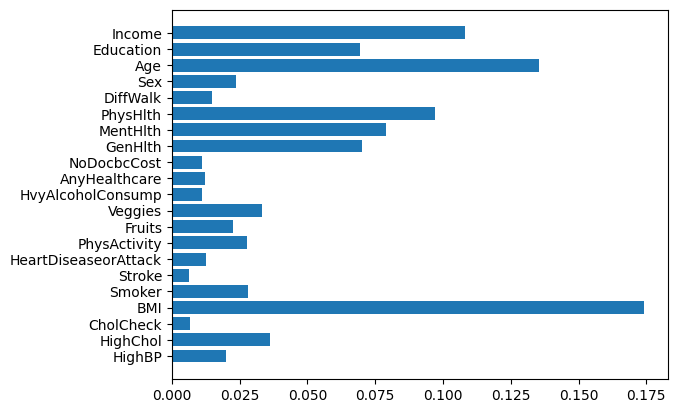

In [114]:
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier().fit(X, y)

plt.barh(width=tree.feature_importances_, y=X.columns)

<BarContainer object of 10 artists>

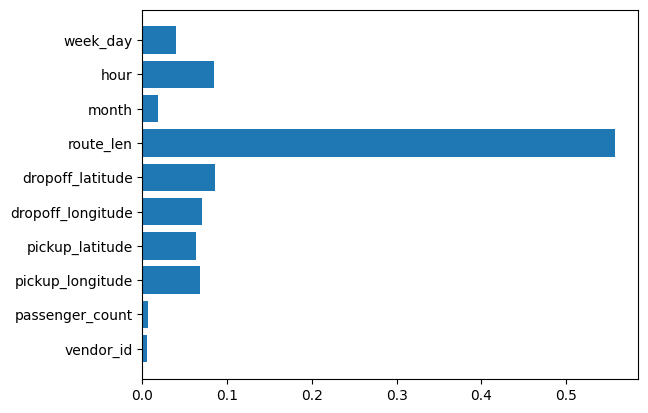

In [115]:
tree = DecisionTreeRegressor().fit(rdata, ry)

plt.barh(width=tree.feature_importances_, y=rdata.columns)

### PCA

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled, y)
X_pca.shape

(622542, 2)

In [117]:
sum(pca.explained_variance_ratio_)

np.float64(0.2475387643500434)

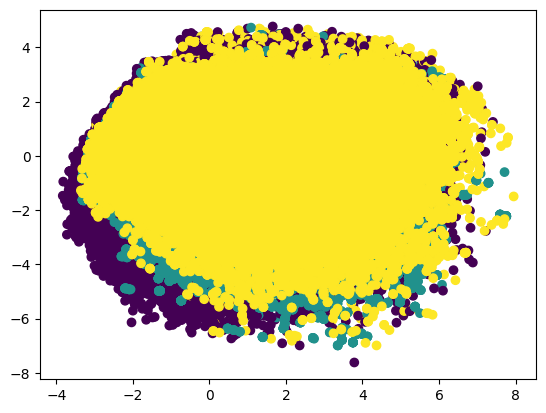

In [118]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [119]:
ctest(X_pca, y)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74     41586
           1       0.88      0.96      0.92     41468
           2       0.76      0.80      0.78     41455

    accuracy                           0.82    124509
   macro avg       0.82      0.82      0.81    124509
weighted avg       0.82      0.82      0.81    124509



In [120]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(rX_scaled, ry)
X_pca.shape

(572668, 2)

In [121]:
sum(pca.explained_variance_ratio_)

np.float64(0.3505539849107978)

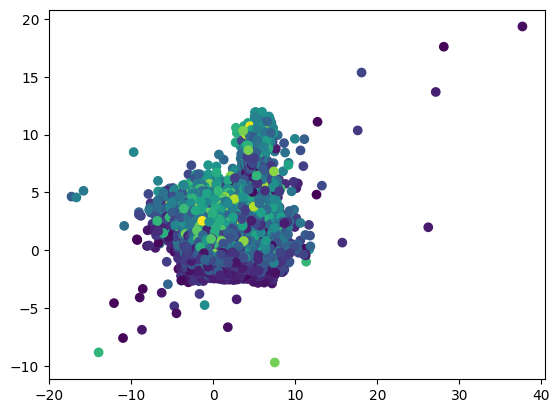

In [122]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=ry);

In [123]:
rtest(X_pca, ry)

MAE: 284.13044362690624
MSE: 132977.44135744683
RMSE: 364.6607208864794
MAPE: 0.8145306258377927
R^2: 0.18817769418918306


In [124]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X_scaled, y)

In [125]:
ctest(X_pca_2, y)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77     41356
           1       0.91      0.96      0.94     41626
           2       0.78      0.81      0.80     41527

    accuracy                           0.84    124509
   macro avg       0.84      0.84      0.84    124509
weighted avg       0.84      0.84      0.84    124509



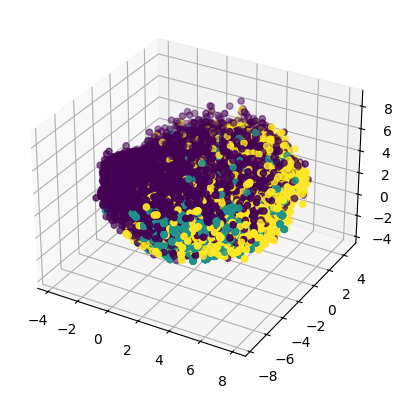

In [126]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y);

In [127]:
rpca_2 = PCA(n_components=3)
rX_pca_2 = rpca_2.fit_transform(rX_scaled, ry)

In [128]:
rtest(rX_pca_2, ry)

MAE: 284.129829914163
MSE: 132975.0489554604
RMSE: 364.6574405595756
MAPE: 0.8145209068473784
R^2: 0.18819229971382867


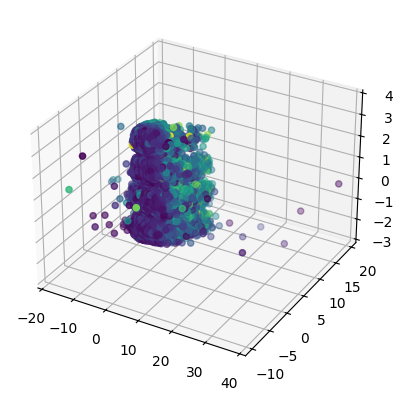

In [129]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(rX_pca_2[:,0], rX_pca_2[:,1], rX_pca_2[:,2], c=ry);

### TSNE

In [130]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled[:10000])

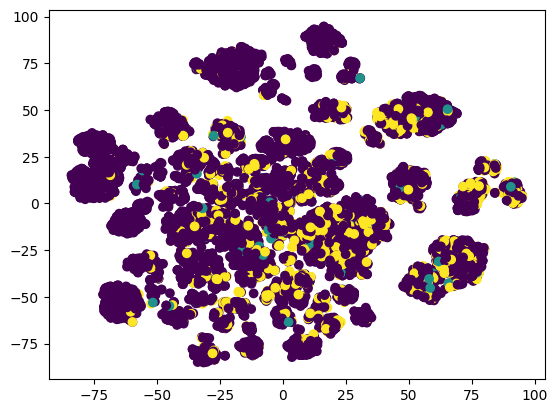

In [131]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y[:10000])

In [132]:
ctest(X_tsne, y[:10000])

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1668
           1       0.00      0.00      0.00        35
           2       0.28      0.16      0.20       297

    accuracy                           0.79      2000
   macro avg       0.38      0.36      0.36      2000
weighted avg       0.75      0.79      0.77      2000



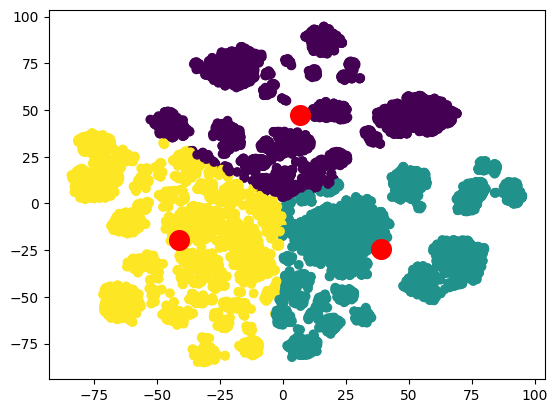

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [134]:
silhouette_score(X_tsne, kmeans.labels_)

np.float32(0.3735808)

In [135]:
rtsne = TSNE(n_components=2)
rX_tsne = rtsne.fit_transform(rX_scaled[:10000])

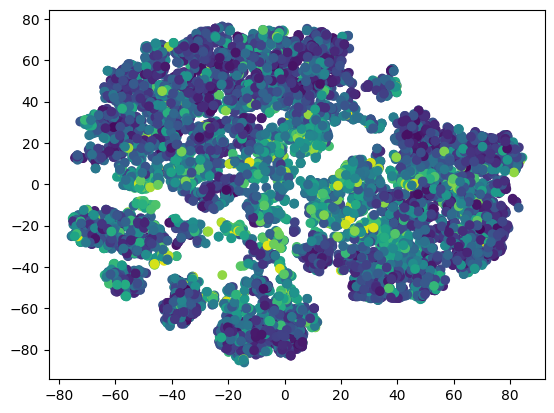

In [136]:
plt.scatter(rX_tsne[:,0], rX_tsne[:,1], c=ry[:10000])

In [137]:
rtest(rX_tsne, ry[:10000])

MAE: 316.8657531738281
MSE: 157239.8125
RMSE: 396.5347557276663
MAPE: 0.8891341128612342
R^2: 0.0062934160232543945


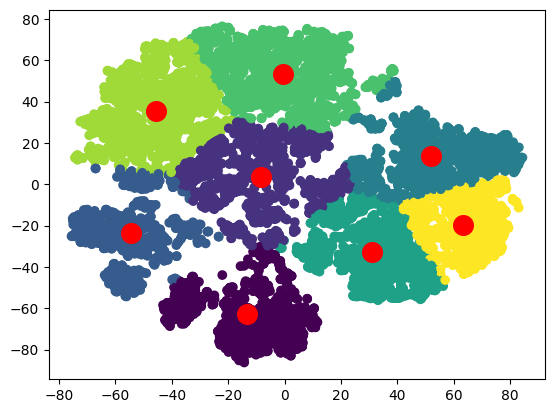

In [138]:
kmeans = KMeans(n_clusters=8).fit(rX_tsne)
plt.scatter(rX_tsne[:,0], rX_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [139]:
silhouette_score(rX_tsne, kmeans.labels_)

np.float32(0.40130025)

### Iso Map

In [140]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled[:10000])

d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive

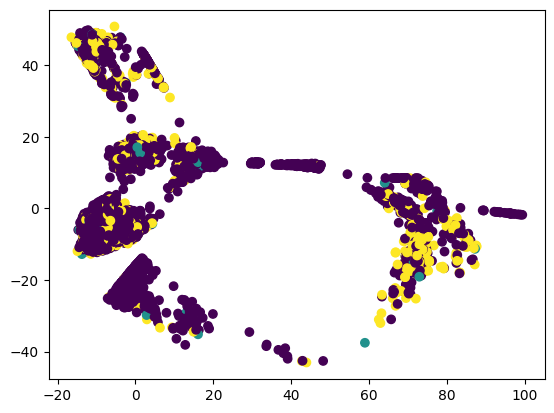

In [141]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y[:10000])

In [142]:
ctest(X_isomap, y[:10000])

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1631
           1       0.00      0.00      0.00        39
           2       0.29      0.13      0.18       330

    accuracy                           0.78      2000
   macro avg       0.37      0.35      0.35      2000
weighted avg       0.72      0.78      0.74      2000



In [143]:
risomap = Isomap(n_components=2)
rX_isomap = risomap.fit_transform(rX_scaled[:10000])

d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


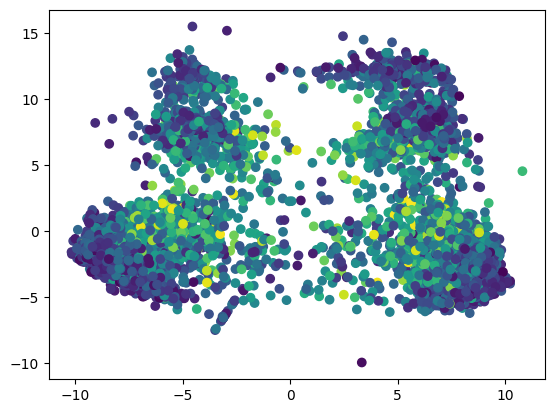

In [144]:
plt.scatter(rX_isomap[:,0], rX_isomap[:,1], c=ry[:10000])

In [145]:
rtest(rX_isomap, ry[:10000])

MAE: 317.2752515690073
MSE: 157424.63496010934
RMSE: 396.76773427297405
MAPE: 0.8902746127052694
R^2: 0.005125372993999733


### UMap


d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\sheld\AppData\Local\Temp\ipykernel_11372\3095150578.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y[:10000], palette=sns.color_palette("hls", 10), legend="full")


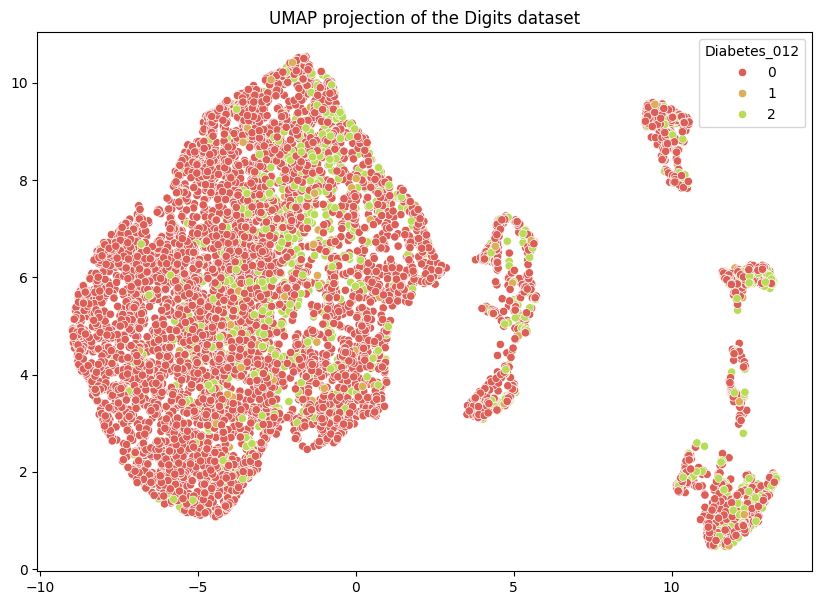

In [146]:
import umap
import seaborn as sns

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(X[:10000])

plt.figure(figsize=(10,7))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y[:10000], palette=sns.color_palette("hls", 10), legend="full")
plt.title("UMAP projection of the Digits dataset")
plt.show()

In [147]:
ctest(embedding, y[:10000])

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      1662
           1       0.00      0.00      0.00        24
           2       0.28      0.13      0.18       314

    accuracy                           0.80      2000
   macro avg       0.37      0.35      0.35      2000
weighted avg       0.74      0.80      0.76      2000



d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\sheld\AppData\Local\Temp\ipykernel_11372\2317903002.py:5: UserWarning: 
The palette list has fewer values (10) than needed (1717) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=r_embedding[:, 0], y=r_embedding[:, 1], hue=ry[:10000], palette=sns.color_palette("hls", 10), legend=False)


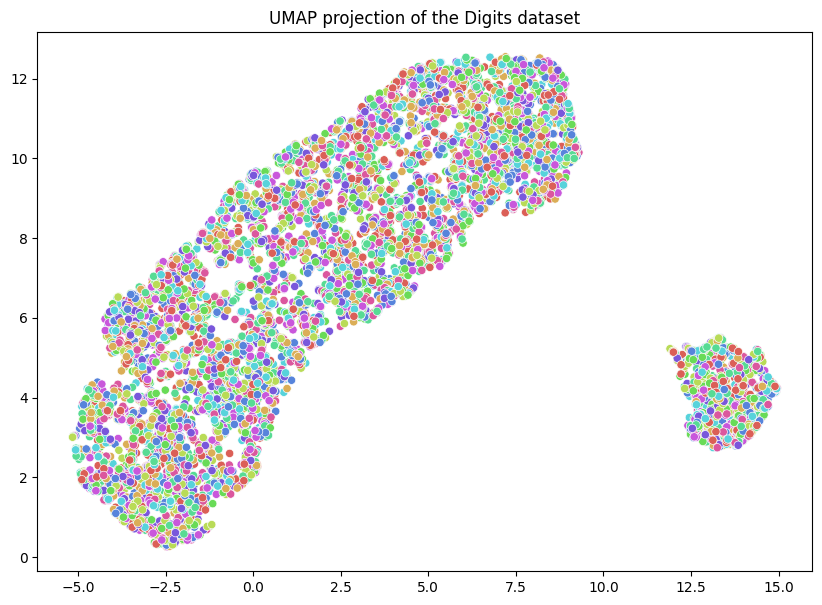

In [148]:
r_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
r_embedding = r_reducer.fit_transform(rdata[:10000])

plt.figure(figsize=(10,7))
sns.scatterplot(x=r_embedding[:, 0], y=r_embedding[:, 1], hue=ry[:10000], palette=sns.color_palette("hls", 10), legend=False)
plt.title("UMAP projection of the Digits dataset")
plt.show()

In [149]:
rtest(r_embedding, ry[:10000])

MAE: 318.5048828125
MSE: 157680.828125
RMSE: 397.0904533289613
MAPE: 0.8941451326309113
R^2: 0.0035062432289123535


### Kernel PCA

rbf

In [150]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="rbf", gamma=15, fit_inverse_transform=True, n_components=2)
X_kpca = kpca.fit_transform(X_scaled[:10000])

Text(0.5, 1.0, 'After Kernel PCA Transformation')

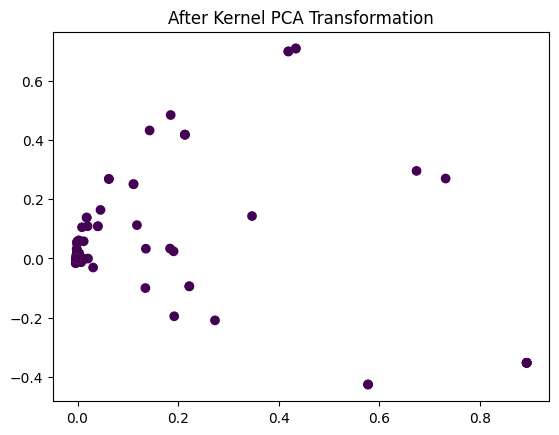

In [151]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y[:10000], cmap='viridis')
plt.title("After Kernel PCA Transformation")

In [152]:
ctest(X_kpca, y[:10000])

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1655
           1       0.00      0.00      0.00        28
           2       0.09      0.01      0.02       317

    accuracy                           0.81      2000
   macro avg       0.30      0.33      0.30      2000
weighted avg       0.70      0.81      0.74      2000



In [154]:
rkpca = KernelPCA(kernel="rbf", gamma=15, fit_inverse_transform=True, n_components=2)
rX_kpca = rkpca.fit_transform(rX_scaled[:10000])

Text(0.5, 1.0, 'After Kernel PCA Transformation')

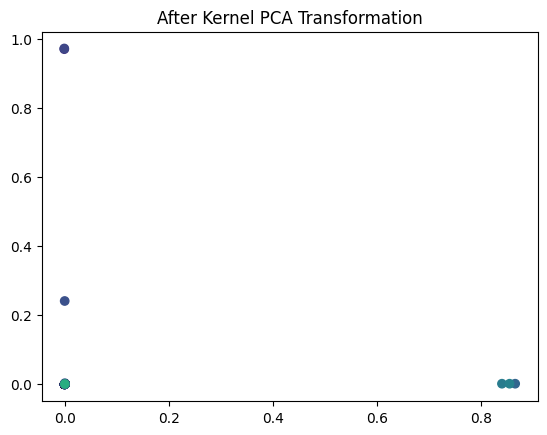

In [ ]:
plt.scatter(rX_kpca[:, 0], rX_kpca[:, 1], c=ry[:10000], cmap='viridis')
plt.title("After Kernel PCA Transformation")

In [163]:
rtest(rX_kpca, ry[:10000])

MAE: 319.16449509133406
MSE: 158254.75310601335
RMSE: 397.81245971690396
MAPE: 0.8946143621581999
R^2: -0.0001207149577775457


poly

In [161]:
from sklearn.decomposition import KernelPCA

kpca_poly = KernelPCA(kernel="poly", gamma=0.01, fit_inverse_transform=True, n_components=2)
X_kpca_poly = kpca_poly.fit_transform(X_scaled[:2500])

Text(0.5, 1.0, 'After Kernel PCA Transformation (poly)')

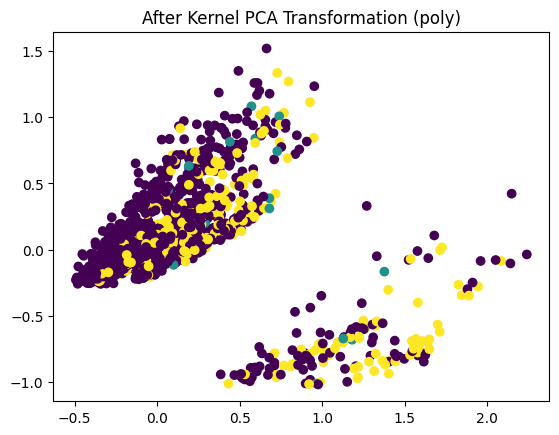

In [162]:
plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1], c=y[:2500], cmap='viridis')
plt.title("After Kernel PCA Transformation (poly)")

In [165]:
ctest(X_kpca_poly, y[:2500])

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       388
           1       0.00      0.00      0.00         7
           2       0.38      0.22      0.28       105

    accuracy                           0.74       500
   macro avg       0.39      0.37      0.37       500
weighted avg       0.70      0.74      0.72       500



In [166]:
from sklearn.decomposition import KernelPCA

r_kpca_poly = KernelPCA(kernel="poly", gamma=0.01, fit_inverse_transform=True, n_components=2)
rX_kpca_poly = r_kpca_poly.fit_transform(rX_scaled[:2500])

Text(0.5, 1.0, 'After Kernel PCA Transformation (poly)')

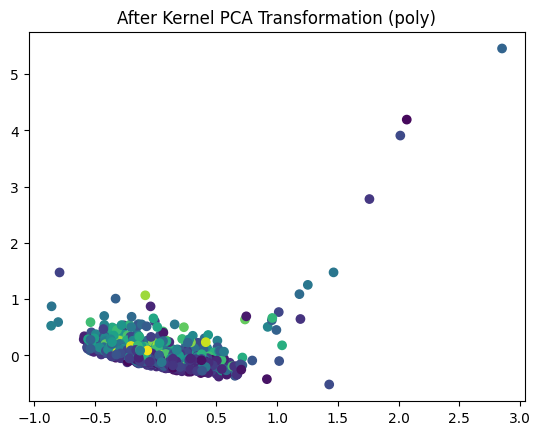

In [167]:
plt.scatter(rX_kpca_poly[:, 0], rX_kpca_poly[:, 1], c=ry[:2500], cmap='viridis')
plt.title("After Kernel PCA Transformation (poly)")

In [168]:
rtest(rX_kpca_poly, ry[:2500])

MAE: 309.95402177321057
MSE: 156037.21384774888
RMSE: 395.0154602642141
MAPE: 0.8509478640902856
R^2: 0.06681868160669213


sigmoid

In [173]:
from sklearn.decomposition import KernelPCA

kpca_sigmoid = KernelPCA(kernel="sigmoid", gamma=0.01, fit_inverse_transform=True, n_components=2)
X_kpca_sigmoid = kpca_sigmoid.fit_transform(X_scaled[:2500])

Text(0.5, 1.0, 'After Kernel PCA Transformation (sigmoid)')

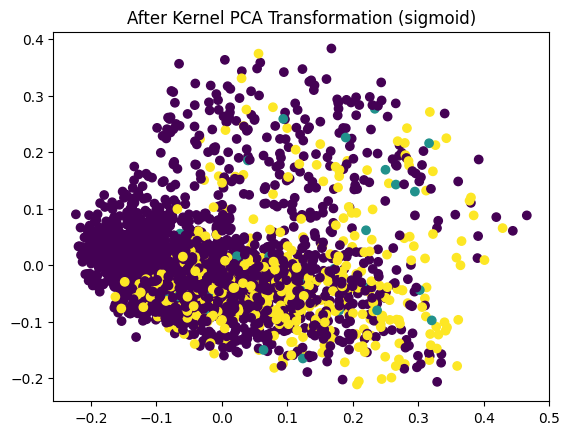

In [171]:
plt.scatter(X_kpca_sigmoid[:, 0], X_kpca_sigmoid[:, 1], c=y[:2500], cmap='viridis')
plt.title("After Kernel PCA Transformation (sigmoid)")

In [174]:
ctest(X_kpca_sigmoid, y[:2500])

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       385
           1       0.00      0.00      0.00         7
           2       0.33      0.20      0.25       108

    accuracy                           0.72       500
   macro avg       0.38      0.36      0.36       500
weighted avg       0.68      0.72      0.70       500



In [175]:
from sklearn.decomposition import KernelPCA

r_kpca_sigmoid = KernelPCA(kernel="sigmoid", gamma=0.01, fit_inverse_transform=True, n_components=2)
rX_kpca_sigmoid = r_kpca_sigmoid.fit_transform(rX_scaled[:2500])

Text(0.5, 1.0, 'After Kernel PCA Transformation (sigmoid)')

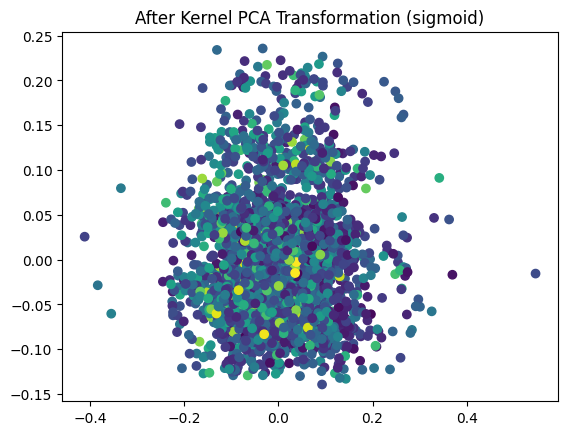

In [176]:
plt.scatter(rX_kpca_sigmoid[:, 0], rX_kpca_sigmoid[:, 1], c=ry[:2500], cmap='viridis')
plt.title("After Kernel PCA Transformation (sigmoid)")

In [186]:
rtest(rX_kpca_sigmoid, ry[:2500])

MAE: 321.16732525915523
MSE: 164155.61697542563
RMSE: 405.1612234350983
MAPE: 0.8678713371453353
R^2: 0.018266532109035283


### Собственная реализация PCA

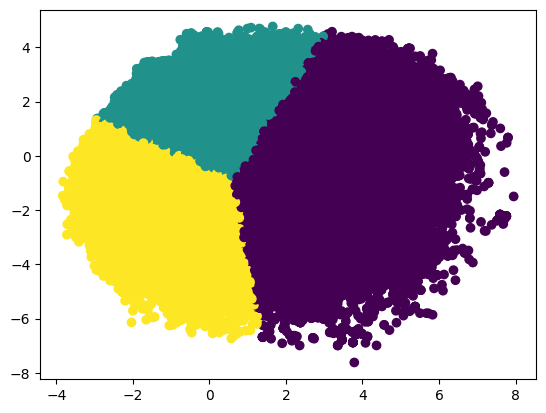

In [185]:
from my_pca import my_pca_func
from myKmeans_realization import myKmeans

transformed_data = my_pca_func(X_scaled, n_components=2)
mkm = labels, centers = myKmeans(transformed_data, 3)

plt.scatter(transformed_data[:,0], transformed_data[:,1], c=labels)

In [182]:
ctest(transformed_data, y)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74     41816
           1       0.88      0.96      0.92     41019
           2       0.76      0.80      0.78     41674

    accuracy                           0.82    124509
   macro avg       0.82      0.82      0.81    124509
weighted avg       0.82      0.82      0.81    124509



<b>Вывод:</b>

Лучше всего себя показали следующие методы понижения размерности:

Для классификации - <b>PCA</b>

Для регрессии - <b>Standart Scaler</b>